In [2]:
import pandas as pd

data = pd.read_csv('data/dataframes/dataframe_final.csv', index_col=0)
label = pd.read_csv('data/dataframes/label_final.csv', index_col=0)

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['date'] = le.fit_transform(data.index)
data

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,0,173,861,3246,1,231,98,1819,905,719,4569
1963-01-01,0,254,245,2251,1,85,1271,0,786,504,858
1963-01-01,0,591,845,3404,1,144,934,380,414,904,6858
1963-01-01,0,372,501,3930,1,51,1582,2922,1156,595,4349
1963-01-01,0,610,791,3439,1,440,1173,2930,347,776,3377
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,3131,346,668,1043,1,70,767,0,642,682,3100
2022-12-26,3131,405,655,2675,0,46,249,1852,821,758,1270
2022-12-26,3131,432,594,1716,1,662,1373,75,655,558,1652
2022-12-26,3131,377,393,3764,1,595,2132,80,621,549,897


In [4]:
label

,0
1963-01-01,1
1963-01-01,2
1963-01-01,3
1963-01-01,4
1963-01-01,5
...,...
2022-12-26,96
2022-12-26,97
2022-12-26,98
2022-12-26,99


In [5]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
data_std = std.fit_transform(data)
data_std = pd.DataFrame(data, columns=data.columns, index=data.index)

In [6]:
import numpy as np
from datetime import datetime

def create_sequences(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    for idx in dataframe.index:
        X = dataframe.loc[dayformat].values
        y = label.loc[dayformat].values
        
        s = np.arange(X.shape[0])
        np.random.shuffle(s)
        X = X[s]
        y = y[s]
        
        Xs.append(X)
        ys.append(y)
        if idx != dayformat:
            dayformat = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [7]:
X, y = create_sequences(1963, data_std, label)
X.shape, y.shape 

((313187,), (313187,))

In [8]:
def sequenceFlatter(X):
    temp = []
    for x in X:
        for i in x:
            temp.append(i)
    temp = np.array(temp)
    return temp

In [9]:
X = sequenceFlatter(X)
y = sequenceFlatter(y)



In [10]:
X.shape

(31317413, 11)

In [11]:
y = y.flatten()
y.shape

(31317413,)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


[4.86582770e+06 2.18201877e+06 8.03902569e+05 4.09184866e+05
 2.41861840e+05 1.10037162e+05 6.68733340e+04 4.33442987e+04
 2.09258445e+04 1.02935670e+04 2.18963653e-01]
[5.55823342e-01 2.49251934e-01 9.18297646e-02 4.67411740e-02
 2.76278702e-02 1.25695415e-02 7.63893879e-03 4.95121784e-03
 2.39035854e-03 1.17583383e-03 2.50122110e-08]


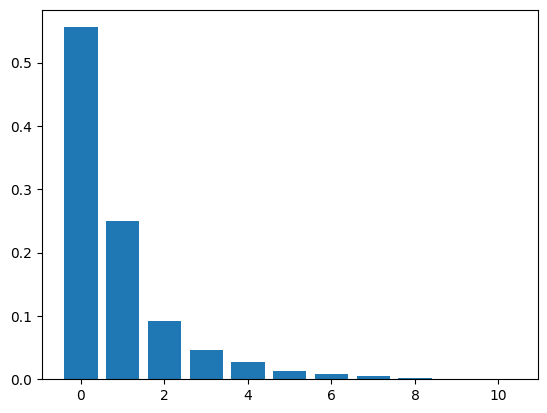

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

x_length = len(X_train[0])
x = np.arange(x_length)

import matplotlib.pyplot as plt 

plt.bar(x, pca.explained_variance_ratio_)
plt.show()

In [29]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

def modelingAndVisualizing(X_train, X_test, title):
    knn = KNeighborsRegressor(n_neighbors=10, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    print('검증 정확도 : ', round(test_score, 3))
    
    plt.plot(range(100), y_test[:100], label='True')
    plt.plot(range(100), y_pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

Standardized_LDA
학습 정확도 :  1.0
검증 정확도 :  -1.447


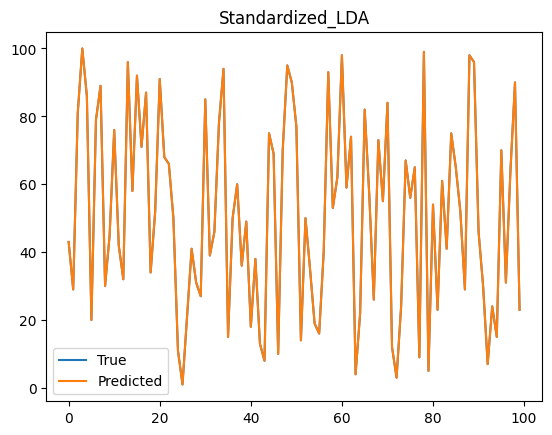

Model saved to models/Standardized_LDA.pkl


In [33]:
modelingList = [
    # (X_train, X_test, 'Standardized'),
    # (X_train_pca, X_test_pca, 'Standardized_PCA'),
    (X_train_lda, X_test_lda, 'Standardized_LDA')
]

import pickle
import os

for model in modelingList:
    knn = modelingAndVisualizing(*model)
    # save model to file
    if not os.path.exists('models'):
        os.makedirs('models')
    filePath = 'models/' + model[2] + '.pkl'
    pickle.dump(knn, open(filePath, 'wb'))
    print('Model saved to', filePath)
    

In [17]:


data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)

In [18]:
data2023['date'] = data2023['date'] + 3132
data2023

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2023-01-01,3132,12,206,574,1,106,333,0,31,173,414
2023-01-01,3132,173,97,666,1,172,524,0,358,463,547
2023-01-01,3132,300,74,652,1,91,527,0,21,430,113
2023-01-01,3132,283,100,47,1,34,350,199,327,476,42
2023-01-01,3132,240,50,49,1,43,514,0,41,466,322
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,3184,187,381,100,1,247,223,0,317,404,416
2023-12-31,3184,262,361,196,0,319,189,0,318,434,30
2023-12-31,3184,92,331,273,1,38,311,22,158,240,393
2023-12-31,3184,344,427,253,0,125,347,142,176,475,167


In [19]:
data2023_std = std.transform(data2023)
data2023_std = pd.DataFrame(data2023_std, columns=data2023.columns, index=data2023.index)

In [25]:
X2023, y2023 = create_sequences(2023, data2023_std, label2023)
X2023 = sequenceFlatter(X2023)
y2023 = sequenceFlatter(y2023)

In [26]:
X2023_pca = pca.transform(X2023)


In [34]:
X2023_lda = lda.transform(X2023)

In [35]:
list2023 = [
    (X2023_pca, 'Standardized_PCA'),
    (X2023_lda, 'Standardized_LDA')
]


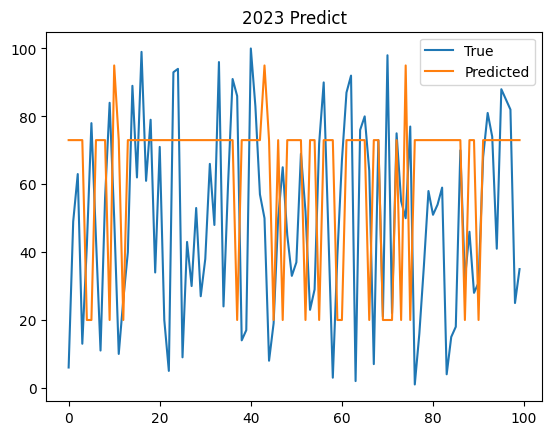

In [39]:
with open('models/Standardized_LDA.pkl', 'rb') as f:
    standardized_LDA_model = pickle.load(f)
pred2023 = standardized_LDA_model.predict(X2023_lda)

# plt
plt.plot(range(100), y2023[:100], label='True')
plt.plot(range(100), pred2023[:100], label='Predicted')
plt.title('2023 Predict')
plt.legend()

plt.show()

In [94]:
def modelingAndVisualizing2023(X_train, y_train, data, label, title):
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X_train, y_train)
    pred = knn.predict(data)
    
    train_score = knn.score(X_train, y_train)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    print("평균 예측 정확도", np.mean(cross_val_score(knn, data, label, cv=5)))
    
    plt.plot(range(100), label[:100], label='True 2023')
    plt.plot(range(100), pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

In [95]:
listFor2023 = [
    (X_train, y_train, X2023, y2023, 'Standardized'),
    (X_train_pca, y_train, X2023_pca, y2023, 'Standardized_PCA')

]

Standardized
학습 정확도 :  1.0
평균 예측 정확도 0.2615941587052333


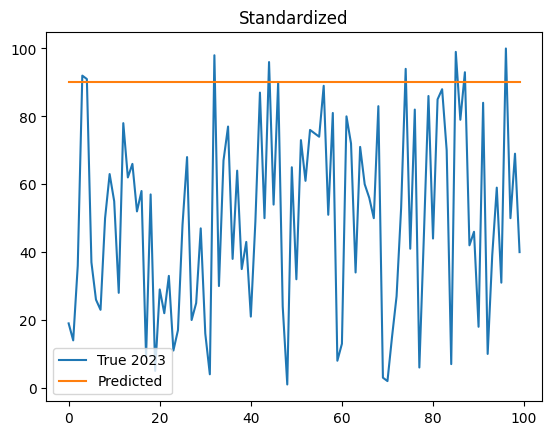

Standardized_PCA
학습 정확도 :  1.0
평균 예측 정확도 0.2597458425980567


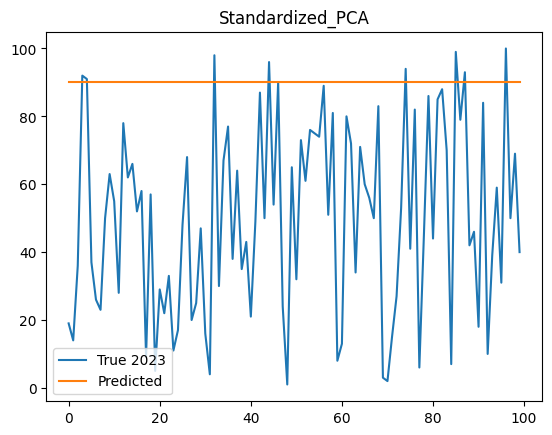

In [96]:
for model in listFor2023:
    modelingAndVisualizing2023(*model)

Standardized_PCA
Best parameters :  {'algorithm': 'brute', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best score :  -0.08771831244025645
Best estimator test score :  -0.08637839235782163
Standardized_PCA


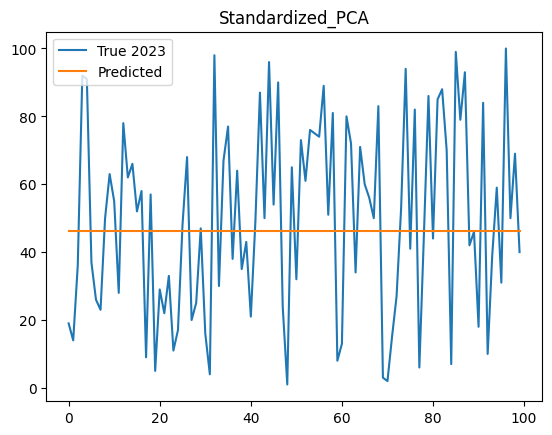

In [97]:
# GridSearchCV로 KNN의 최적 파라미터 찾기
# 최적 모델 선정 후 models/best_KNN.pkl로 저장
# 최적 모델로 2023년 데이터 예측 후 시각화

from sklearn.model_selection import GridSearchCV

def getBestKNN(X_train, X_test, title):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors': [2,3,4,5,6,7,8,9,10],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski','euclidean','manhattan'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10,20,30,40,50,60,70,80,90,100],
        'p': [1,2]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train[-20000:], y_train[:20000])
    
    print(title)
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score : ', grid_search.best_estimator_.score(X_test, y_test))

    return grid_search.best_estimator_

knnList = [
    (X_train_pca, X_test_pca, 'Standardized_PCA')
]

list2023 = [
    (X2023_pca, 'Standardized_PCA')
    
]

# modelingList의 데이터로 학습한 최적 모델로 list2023의 데이터들로 2023년 데이터 예측
def predict2023(model, data, label, title):
    pred = model.predict(data)
    
    print(title)
    plt.plot(range(100), label[:100], label='True 2023')
    plt.plot(range(100), pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    
for knn, model in zip(knnList, list2023):
    bestModel = getBestKNN(*knn)
    predict2023(bestModel, model[0], y2023, model[1])

In [29]:
def modelingAndVisualizing2023(X_train, X_test, title, data, label, n_neighbors, metric='minkowski'):
    knn = KNeighborsRegressor(algorithm='ball_tree', leaf_size=60, n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    test = knn.predict(X_test)
    pred = knn.predict(data)
    
    train_score = knn.score(X_train, y_train)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    print("평균 예측 정확도", np.mean(cross_val_score(knn, data, label, cv=5)))
    
    plt.plot(range(100), y_test[:100], label='True Test')
    plt.plot(range(100), test[:100], label='Predicted')
    plt.title("Test " + title)
    plt.legend()
    plt.show()
    
    plt.plot(range(100), label[:100], label='True 2023')
    plt.plot(range(100), pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

In [30]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 10)

Standardized
학습 정확도 :  0.581
평균 예측 정확도 0.22419541528355916


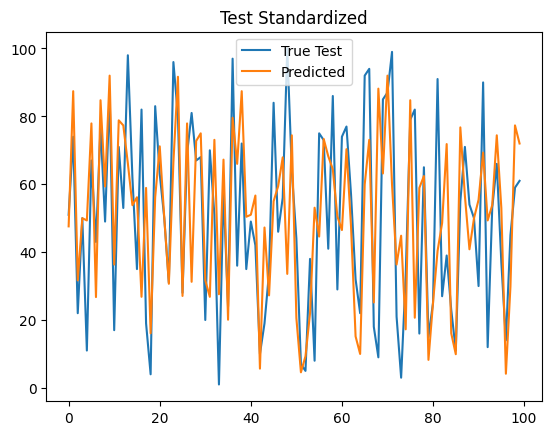

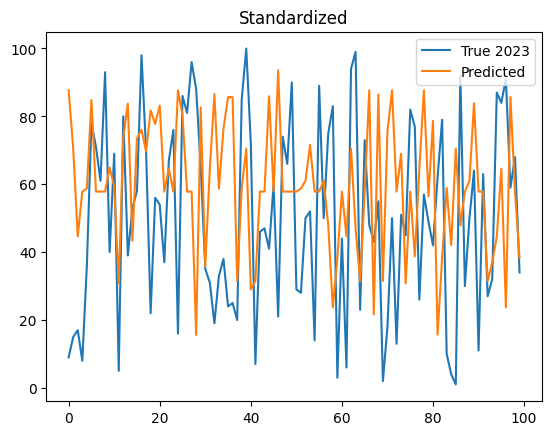

Standardized_LDA
학습 정확도 :  0.58
평균 예측 정확도 0.24077746752775536


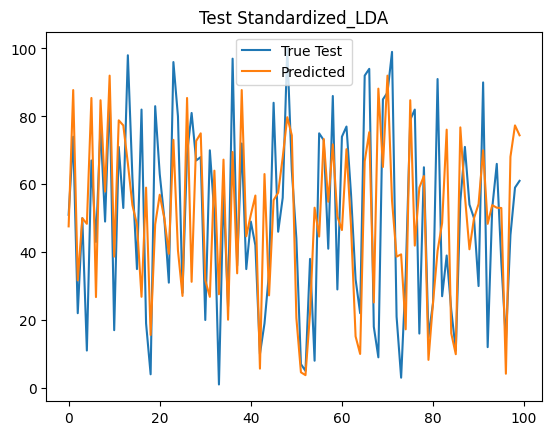

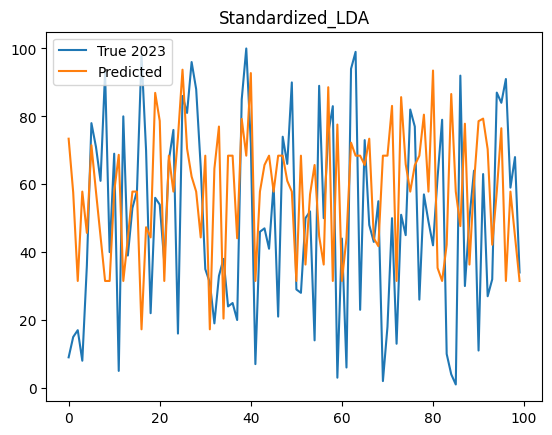

In [33]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 12, 'manhattan')

Standardized
학습 정확도 :  0.881
평균 예측 정확도 0.29292737437456534


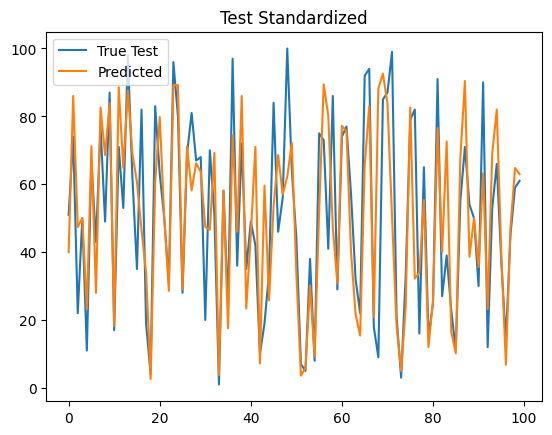

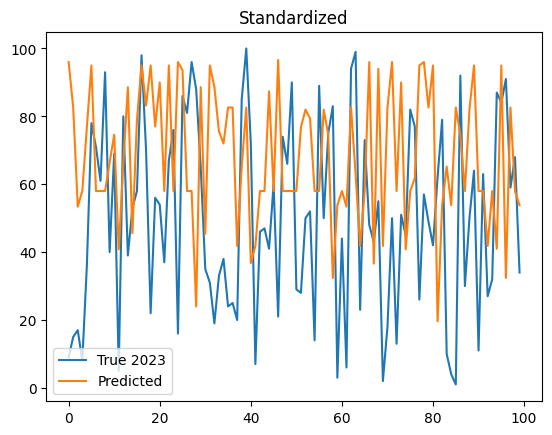

Standardized_LDA
학습 정확도 :  0.881
평균 예측 정확도 0.2922138700750828


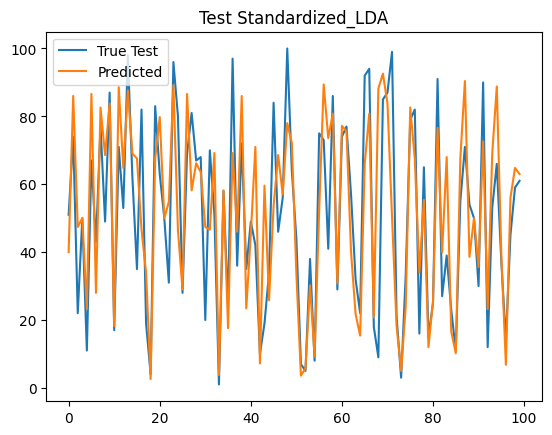

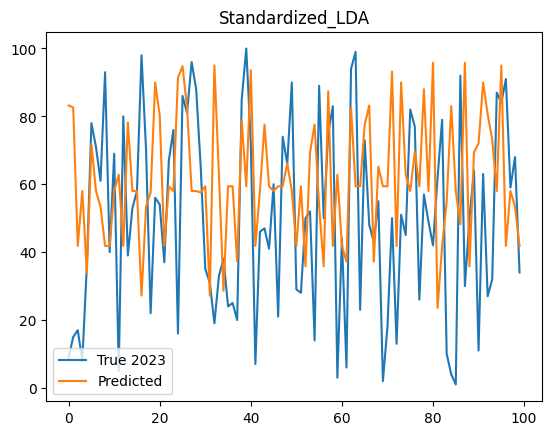

In [35]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 5, 'manhattan')